## 2D Be lens with $R=50\mu$m - simulations

created: **19/07/2022**; last edited: **11/08/2022**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)

<hr style="border:1px solid gray">


In [1]:
# imports

# checking we are using the correct python:
import sys
print(sys.executable)
print(sys.version)
sys.path.insert(0, '../../pylibs/')

%matplotlib notebook
import matplotlib.pylab as pl

from f_index_of_refraction import index_of_refraction

import barc4plots.barc4plots as b4pt         # get barc4plots: https://gitlab.esrf.fr/celestre/barc4plots
import barc4ro.projected_thickness as b4ro   # get barc4ro: https://github.com/oasys-kit/oasys-barc4ro
import barc4ro.barc4ro as b4RO

import numpy as np
    
from oasys_srw.srwlib import *          # get oasys_srw: https://github.com/oasys-kit/OASYS1-srwpy
from oasys_srw.uti_plot import *

/home/esrf/celestre/miniconda/envs/xog/bin/python
3.8.12 (default, Oct 12 2021, 13:49:34) 
[GCC 7.5.0]


In [2]:
# global variables

beamE = 17        # in keV
pix_size = 0.635  # in um
scan = [0, 1, 2, 3, 4, 6, 8, 10, 12]     # angles for the scan (degrees)
dpi = 250   # for plots

#### x-ray lens

In [3]:
# x-ray lens parameters in meters

mat = 'Be'
delta, beta, att_len = index_of_refraction(mat, beamE*1e3)

print('>>> %s: n = 1 - %.6e + i %.6e (att. length %.6e) at %.3f keV'%(mat, delta, beta, att_len, beamE))

R = 50e-6   # radius
L = 1e-3    # total thickness
wt = 35e-6  # wall thickness
A = 2*np.sqrt((L-wt)*R)  # geometric aperture
focal_plane = 3          # plane of focusing: 1- horizontal, 2- vertical, 3- both
nCRL = 1

# axis for lens calculations
d = 400
x = np.linspace(-d, d, int(2*d/pix_size)+1)*1e-6
y = x

>>> Be: n = 1 - 1.178476e-06 + i 2.360165e-10 (att. length 2.459037e-02) at 17.000 keV


<hr style="border:1px solid gray">

### Gradients calculation

In [4]:
# loop for gradient calculation:

hh = np.zeros([len(scan), len(x)])    # horizontal cut
vv = np.zeros([len(scan), len(y)])    # vertical cut

k = 0
for angle in scan:
    print('angle %.1f' %angle)
    x, y, lens = b4ro.proj_thick_2D_crl(_foc_plane=focal_plane, _shape=1, _apert_h=A, _apert_v=A, _r_min=R, _n=2,
                              _wall_thick=wt, _xc=0, _yc=0, _nx=len(x), _ny=len(y), _ang_rot_ex=0, _ang_rot_ey=angle,
                              _ang_rot_ez=0, _offst_ffs_x=0, _offst_ffs_y=0, _tilt_ffs_x=0, _tilt_ffs_y=0,
                              _ang_rot_ez_ffs=0, _wt_offst_ffs=0, _offst_bfs_x=0, _offst_bfs_y=0, _tilt_bfs_x=0,
                              _tilt_bfs_y=0, _ang_rot_ez_bfs=0, _wt_offst_bfs=0, isdgr=True, project=True,
                              _axis_x=x, _axis_y=y, _aperture='c')

    ver, hor = np.gradient(lens*delta, (x[1] - x[0]), (y[1] - y[0]))
    
    image = b4pt.Image2Plot(hor*1e6, x*1e6, y*1e6)
    image.legends = ['', '($\mu$m)', '($\mu$m)']
    image.Colorbar = True
    image.LaTex = True
    image.AspectRatio = True
    image.ColorScheme = 12
    image.plt_limits = [-20, 20]
    image.ax_limits = [-d, d, -A*0.60e6, A*0.60e6]
    image.FontsSizeScale = 1.3
    image.sort_class()
    b4pt.plot_2D_cuts(image, './results/2D_Be_R50um_hor_grad_%s.png'%angle, Enable=False, Silent=True, dpi=dpi)

    image = b4pt.Image2Plot(ver*1e6, x*1e6, y*1e6)
    image.legends = ['', '($\mu$m)', '($\mu$m)']
    image.Colorbar = True
    image.LaTex = True
    image.AspectRatio = True
    image.ColorScheme = 12
    image.plt_limits = [-20, 20]
    image.ax_limits = [-d, d, -A*0.60e6, A*0.60e6]
    image.FontsSizeScale = 1.3
    image.sort_class()
    b4pt.plot_2D_cuts(image, './results/2D_Be_R50um_ver_grad_%s.png'%angle, Enable=False, Silent=True, dpi=dpi)
    
    hh[k, :] = hor[int(len(y)/2), :]
    vv[k, :] = ver[:,int(len(x)/2)]

    k +=1
    
np.save('./results/2D_Be_R50um_hor_grad', hh)
np.save('./results/2D_Be_R50um_ver_grad', vv)

np.save('./results/2D_Be_R50um_hor_grad_axis', x)
np.save('./results/2D_Be_R50um_ver_grad_axis', y)


angle 0.0
>>>> file 2D_Be_R50um_hor_grad_0.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_0.png saved to disk.
angle 1.0
>>>> file 2D_Be_R50um_hor_grad_1.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_1.png saved to disk.
angle 2.0
>>>> file 2D_Be_R50um_hor_grad_2.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_2.png saved to disk.
angle 3.0
>>>> file 2D_Be_R50um_hor_grad_3.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_3.png saved to disk.
angle 4.0
>>>> file 2D_Be_R50um_hor_grad_4.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_4.png saved to disk.
angle 6.0
>>>> file 2D_Be_R50um_hor_grad_6.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_6.png saved to disk.
angle 8.0
>>>> file 2D_Be_R50um_hor_grad_8.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_8.png saved to disk.
angle 10.0
>>>> file 2D_Be_R50um_hor_grad_10.png saved to disk.
>>>> file 2D_Be_R50um_ver_grad_10.png saved to disk.
angle 12.0
>>>> file 2D_Be_R50um_hor_grad_12.png saved to disk.
>>>> file 2D_Be_R50um

>>>> file 2D_Be_R50um_hor_grad_cuts.png saved to disk.


<IPython.core.display.Javascript object>


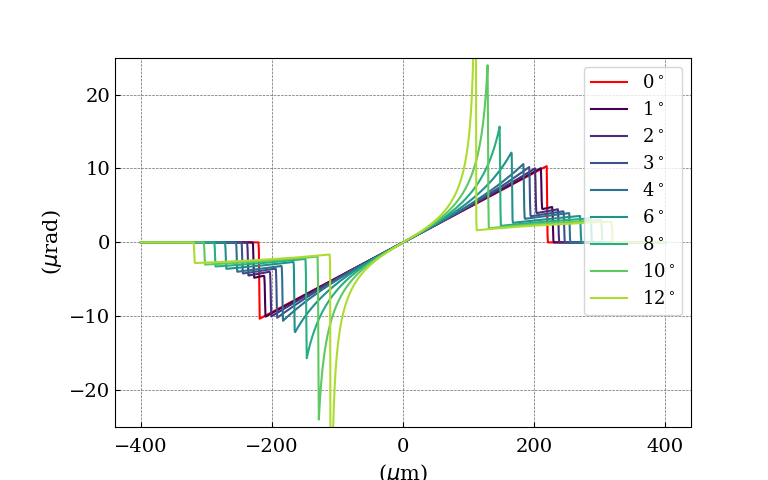

In [5]:
colors = pl.cm.viridis(np.linspace(0,1,len(scan)))

for i in range(len(scan)):
    image = b4pt.Image2Plot(hh[i, :]*1e6, x*1e6)
    image.AspectRatio = False
    image.LaTex = True
    image.legends = ['', '($\mu$m)', '($\mu$rad)']
    image.LineStyle = '-'
    image.label = str(scan[i])+'$^\circ$'
    image.LabelPos = 1
    image.ax_limits = [-A*1e6, A*1e6, -25, 25]
    image.grid = True
    image.sort_class()
    if i == 0:
        image.ColorScheme = -2
        b4pt.plot_1D(image, Enable=False, Hold=False)
    elif i == len(scan)-1:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, './results/2D_Be_R50um_hor_grad_cuts.png', Enable=True, Hold=True, dpi=dpi)
    else:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, Enable=False, Hold=True)

>>>> file 2D_Be_R50um_ver_grad_cuts.png saved to disk.


<IPython.core.display.Javascript object>


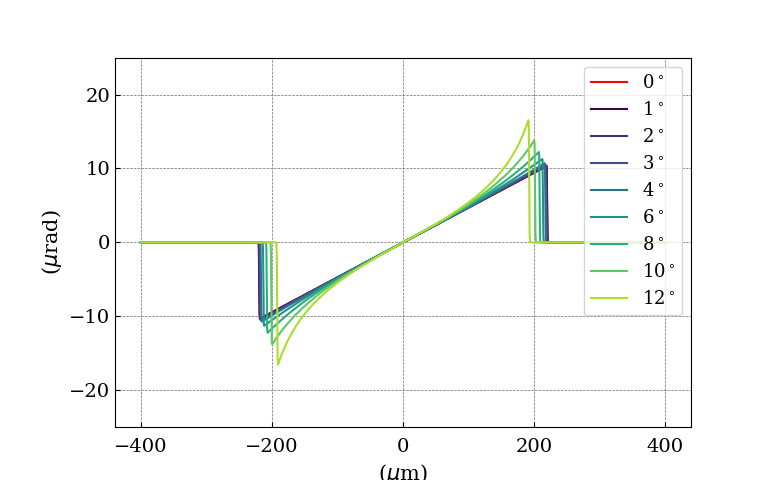

In [6]:
for i in range(len(scan)):
    image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
    image.AspectRatio = False
    image.LaTex = True
    image.legends = ['', '($\mu$m)', '($\mu$rad)']
    image.LineStyle = '-'
    image.label = str(scan[i])+'$^\circ$'
    image.LabelPos = 1
    image.ax_limits = [-A*1e6, A*1e6, -25, 25]
    image.grid = True
    image.sort_class()
    if i == 0:
        image.ColorScheme = -2
        b4pt.plot_1D(image, Enable=False, Hold=False)
    elif i == len(scan)-1:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, './results/2D_Be_R50um_ver_grad_cuts.png', Enable=True, Hold=True, dpi=dpi)
    else:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, Enable=False, Hold=True)

<hr style="border:1px solid gray">

### radiographs with SRW

In [7]:
# ---------- beamline characteristics
posLens = 60         # initial position in [m]
posObserver = 0.4    # [m]
sampling_factor = .0
emittance_x = 1
emittance_y = 1

show_intensity = False

# axis for lens calculations
x = np.linspace(-(d+200), d+200, int(2*(d+200)/pix_size)+1)*1e-6
y = x

#### light source

In [8]:
mesh = SRWLRadMesh(_eStart=beamE*1e3,
                   _eFin  =beamE*1e3,
                   _ne    =1,
                   _xStart=x[0],
                   _xFin  =x[-1],
                   _nx    =len(x),
                   _yStart=y[0],
                   _yFin  =y[-1],
                   _ny    =len(y),
                   _zStart=posLens)
wfr = SRWLWfr()
wfr.allocate(mesh.ne, mesh.nx, mesh.ny)
wfr.unitElFld = 1
wfr.mesh = mesh
part_beam = SRWLPartBeam()
part_beam.Iavg = 0.2
part_beam.partStatMom1.x = 0.0
part_beam.partStatMom1.y = 0.0
part_beam.partStatMom1.z = -1.3139999999999998
part_beam.partStatMom1.xp = 0.0
part_beam.partStatMom1.yp = 0.0
part_beam.partStatMom1.gamma = 11741.70710144324
part_beam.arStatMom2[0] = 8.838729000000001e-10*np.sqrt(emittance_x)    # <(x-<x>)^2>
part_beam.arStatMom2[1] = 0.0                                           # <(x-<x>)(x'-<x'>)>
part_beam.arStatMom2[2] = 1.9096899999999998e-11*np.sqrt(emittance_x)   # <(x'-<x'>)^2>
part_beam.arStatMom2[3] = 2.79841e-11*np.sqrt(emittance_y)              # <(y-<y>)^2>
part_beam.arStatMom2[4] = 0.0                                           # <(y-<y>)(y'-<y'>)>
part_beam.arStatMom2[5] = 3.5720999999999997e-12*np.sqrt(emittance_y)   # <(y'-<y'>)^2>
part_beam.arStatMom2[10] = 7.920999999999999e-07                        # <(E-<E>)^2>/<E>^2

wfr.partBeam = part_beam

GsnBm = SRWLGsnBm()
GsnBm.x = 0
GsnBm.y = 0
GsnBm.z = 0
GsnBm.xp = 0
GsnBm.yp = 0
GsnBm.avgPhotEn = beamE * 1E3
GsnBm.pulseEn = 0.001
GsnBm.repRate = 1
GsnBm.polar = 1
GsnBm.sigX = 1e-7 #/ 2.35
GsnBm.sigY = 1e-7 #/ 2.35
GsnBm.sigT = 10e-15
GsnBm.mx = 0
GsnBm.my = 0

constConvRad = 1.23984186e-06 / (4 * 3.1415926536)
rmsAngDiv = constConvRad / (GsnBm.avgPhotEn * GsnBm.sigX)  # RMS angular divergence [rad]
print('RMS Source Size:', round(GsnBm.sigX * 1.e+06, 3), 'um; RMS Divergence:', round(rmsAngDiv * 1.e+06, 3), 'urad')

magnetic_field_container = GsnBm

# wfr.partBeam.partStatMom1.x = 2.973e-05 * np.sqrt(emittance_x)  # GsnBm.x
# wfr.partBeam.partStatMom1.y = 5.290e-06 * np.sqrt(emittance_x)  # GsnBm.y
# wfr.partBeam.partStatMom1.z = 0                                 # GsnBm.z
# wfr.partBeam.partStatMom1.xp = 4.37e-06 * np.sqrt(emittance_y)  # GsnBm.xp
# wfr.partBeam.partStatMom1.yp = 1.89e-06 * np.sqrt(emittance_y)  # GsnBm.yp

arPrecPar = [sampling_factor]

print('- Gaussian beam Initial Electric Field calculation... ')
srwl.CalcElecFieldGaussian(wfr, GsnBm, arPrecPar)

print('Initial wavefront:')
print('Nx = %d, Ny = %d' % (wfr.mesh.nx, wfr.mesh.ny))
print('dx = %.4f um, dy = %.4f um' % ((wfr.mesh.xFin - wfr.mesh.xStart) * 1E6 / wfr.mesh.nx, (wfr.mesh.yFin - wfr.mesh.yStart) * 1E6 / wfr.mesh.ny))
print('range x = %.4f mm, range y = %.4f mm' % ((wfr.mesh.xFin - wfr.mesh.xStart) * 1E3, (wfr.mesh.yFin - wfr.mesh.yStart) * 1E3))
print('Rx = %.6f, Ry = %.6f' % (wfr.Rx, wfr.Ry))


RMS Source Size: 0.1 um; RMS Divergence: 58.037 urad
- Gaussian beam Initial Electric Field calculation... 
Initial wavefront:
Nx = 1890, Ny = 1890
dx = 0.6349 um, dy = 0.6349 um
range x = 1.2000 mm, range y = 1.2000 mm
Rx = 60.000000, Ry = 60.000000


In [9]:
if show_intensity:        # debug
    mesh0 = deepcopy(wfr.mesh)
    arI = array('f', [0]*mesh0.nx*mesh0.ny)
    srwl.CalcIntFromElecField(arI, wfr, 6, 0, 3, mesh0.eStart, 0, 0)
    arIx = array('f', [0]*mesh0.nx)
    srwl.CalcIntFromElecField(arIx, wfr, 6, 0, 1, mesh0.eStart, 0, 0)
    arIy = array('f', [0]*mesh0.ny)
    srwl.CalcIntFromElecField(arIy, wfr, 6, 0, 2, mesh0.eStart, 0, 0)

    arP = array('d', [0]*mesh0.nx*mesh0.ny)
    srwl.CalcIntFromElecField(arP, wfr, 0, 4, 3, mesh0.eStart, 0, 0)
    arPx = array('d', [0]*mesh0.nx)
    srwl.CalcIntFromElecField(arPx, wfr, 0, 4, 1, mesh0.eStart, 0, 0)
    arPy = array('d', [0]*mesh0.ny)
    srwl.CalcIntFromElecField(arPy, wfr, 0, 4, 2, mesh0.eStart, 0, 0)

    plotMesh0x = [1000*mesh0.xStart, 1000*mesh0.xFin, mesh0.nx]
    plotMesh0y = [1000*mesh0.yStart, 1000*mesh0.yFin, mesh0.ny]
    uti_plot2d1d(arI, plotMesh0x, plotMesh0y, labels=['Horizontal Position [mm]', 'Vertical Position [mm]', 'Intensity Before Propagation'])
    uti_plot2d1d(arP, plotMesh0x, plotMesh0y, labels=['Horizontal Position [mm]', 'Vertical Position [mm]', 'Phase Before Propagation'])

    uti_plot_show()

In [10]:
"""
[ 0]: Auto-Resize (1) or not (0) Before propagation
[ 1]: Auto-Resize (1) or not (0) After propagation
[ 2]: Relative Precision for propagation with Auto-Resizing (1. is nominal)
[ 3]: Type of Free-Space Propagator:
       0- Standard Fresnel
       1- Fresnel with analytical treatment of the quadratic (leading) phase terms
       2- Similar to 1, yet with different processing near a waist
       3- For propagation from a waist over a ~large distance
       4- For propagation over some distance to a waist
       5- Huygens-Fresnel diffraction integral (only after commit 34)
[ 4]: Do any Resizing on Fourier side, using FFT, (1) or not (0)
[ 5]: Horizontal range modification factor at Resizing (1. means no modification)
[ 6]: Horizontal Resolution modification factor at Resizing
[ 7]: Vertical range modification factor at Resizing
[ 8]: Vertical Resolution modification factor at Resizing
[ 9]: Type of wavefront Shift before Resizing (not yet implemented)
[10]: New Horizontal wavefront Center position after Shift (not yet implemented)
[11]: New Vertical wavefront Center position after Shift (not yet implemented)
"""

for angle in scan:
    print('angle %.3f' % angle)
    wfrp = deepcopy(wfr)

    srw_oe_array = []
    srw_pp_array = []

    # ============= tilted CRL
    CRL = b4RO.srwl_opt_setup_CRL(_foc_plane=focal_plane, _delta=delta, _atten_len=att_len, _shape=1,
                                  _apert_h=A, _apert_v=A, _r_min=R, _n=nCRL, _wall_thick=wt, _xc=0, _yc=0,
                                  _e_start=0, _e_fin=0, _nx=len(x), _ny=len(y), _ang_rot_ex=0, _ang_rot_ey=angle,
                                  _ang_rot_ez=0, _offst_ffs_x=0, _offst_ffs_y=0, _tilt_ffs_x=0, _tilt_ffs_y=0,
                                  _ang_rot_ez_ffs=0, _wt_offst_ffs=0, _offst_bfs_x=0, _offst_bfs_y=0, _tilt_bfs_x=0,
                                  _tilt_bfs_y=0, _ang_rot_ez_bfs=0, _wt_offst_bfs=0, _axis_x=x, _axis_y=y,
                                  isdgr=True)

    pp = [0, 0, 1, 1, 0, 1., 1., 1., 1., 0, 0, 0]

    srw_oe_array.append(CRL)
    srw_pp_array.append(pp)

    # ============= observation plane
    drift = SRWLOptD(posObserver)
    pp = [0, 0, 1, 1, 0, 1., 1., 1., 1., 0, 0, 0]

    srw_oe_array.append(drift)
    srw_pp_array.append(pp)

    # ============= recrop/resample
    pp = [0, 0, 1, 1, 0, 0.95, 1., 0.95, 1., 0, 0, 0]
    srw_pp_array.append(pp)

    optBL = SRWLOptC(srw_oe_array, srw_pp_array)

    print('- Simulating Electric Field Wavefront Propagation ... ')
    srwl.PropagElecField(wfrp, optBL)

    print('Initial wavefront:')
    print('Nx = %d, Ny = %d' % (wfrp.mesh.nx, wfrp.mesh.ny))
    print('dx = %.4f um, dy = %.4f um' % ((wfrp.mesh.xFin - wfrp.mesh.xStart) * 1E6 / wfrp.mesh.nx, (wfrp.mesh.yFin - wfrp.mesh.yStart) * 1E6 / wfrp.mesh.ny))
    print('range x = %.4f mm, range y = %.4f mm' % ((wfrp.mesh.xFin - wfrp.mesh.xStart) * 1E3, (wfrp.mesh.yFin - wfrp.mesh.yStart) * 1E3))
    print('Rx = %.6f, Ry = %.6f' % (wfrp.Rx, wfrp.Ry))

    mesh = deepcopy(wfrp.mesh)
    arI = array('f', [0]*mesh.nx*mesh.ny)
    srwl.CalcIntFromElecField(arI, wfrp, 6, 0, 3, mesh.eStart, 0, 0)
    # if save:
    im = np.reshape(arI, (mesh.ny, mesh.nx))
    _x = np.linspace(mesh.xStart, mesh.xFin, mesh.nx)
    _y = np.linspace(mesh.yStart, mesh.yFin, mesh.ny)

    image = b4pt.Image2Plot(im, _x * 1e6, _y * 1e6)
    image.legends = ['', '($\mu$m)', '($\mu$m)']
    image.Colorbar = False
    image.LaTex = True
    image.AspectRatio = True
    image.ColorScheme = 2
    image.plt_limits = [np.mean(im)-3*np.std(im), np.mean(im)+3*np.std(im)]
    image.ax_limits = [-d, d, -A*0.60e6, A*0.60e6]
    image.FontsSizeScale = 1.3
    image.sort_class()
    b4pt.plot_2D(image, './results/2D_Be_R50um_radio_%s.png' % angle, Enable=False, Silent=True, dpi=dpi)
    
    
    
    if show_intensity:        # debug
        mesh0 = deepcopy(wfrp.mesh)
        arI = array('f', [0]*mesh0.nx*mesh0.ny)
        srwl.CalcIntFromElecField(arI, wfrp, 6, 0, 3, mesh0.eStart, 0, 0)
        arIx = array('f', [0]*mesh0.nx)
        srwl.CalcIntFromElecField(arIx, wfrp, 6, 0, 1, mesh0.eStart, 0, 0)
        arIy = array('f', [0]*mesh0.ny)
        srwl.CalcIntFromElecField(arIy, wfrp, 6, 0, 2, mesh0.eStart, 0, 0)

        arP = array('d', [0]*mesh0.nx*mesh0.ny)
        srwl.CalcIntFromElecField(arP, wfrp, 0, 4, 3, mesh0.eStart, 0, 0)
        arPx = array('d', [0]*mesh0.nx)
        srwl.CalcIntFromElecField(arPx, wfrp, 0, 4, 1, mesh0.eStart, 0, 0)
        arPy = array('d', [0]*mesh0.ny)
        srwl.CalcIntFromElecField(arPy, wfrp, 0, 4, 2, mesh0.eStart, 0, 0)

        plotMesh0x = [1000*mesh0.xStart, 1000*mesh0.xFin, mesh0.nx]
        plotMesh0y = [1000*mesh0.yStart, 1000*mesh0.yFin, mesh0.ny]
        uti_plot2d1d(arI, plotMesh0x, plotMesh0y, labels=['Horizontal Position [mm]', 'Vertical Position [mm]', 'Intensity After Propagation'])
        uti_plot2d1d(arP, plotMesh0x, plotMesh0y, labels=['Horizontal Position [mm]', 'Vertical Position [mm]', 'Phase After Propagation'])

        uti_plot_show()
   

angle 0.000
Optical Element Setup: CRL Focal Length: 21.213840928408313 m
- Simulating Electric Field Wavefront Propagation ... 
Initial wavefront:
Nx = 1800, Ny = 1800
dx = 0.6272 um, dy = 0.6272 um
range x = 1.1289 mm, range y = 1.1289 mm
Rx = -32.416615, Ry = -32.416615
>>>> file 2D_Be_R50um_radio_0.png saved to disk.
angle 1.000
Optical Element Setup: CRL Focal Length: 21.213840928408313 m
- Simulating Electric Field Wavefront Propagation ... 
Initial wavefront:
Nx = 1800, Ny = 1800
dx = 0.6272 um, dy = 0.6272 um
range x = 1.1289 mm, range y = 1.1289 mm
Rx = -32.416615, Ry = -32.416615
>>>> file 2D_Be_R50um_radio_1.png saved to disk.
angle 2.000
Optical Element Setup: CRL Focal Length: 21.213840928408313 m
- Simulating Electric Field Wavefront Propagation ... 
Initial wavefront:
Nx = 1800, Ny = 1800
dx = 0.6272 um, dy = 0.6272 um
range x = 1.1289 mm, range y = 1.1289 mm
Rx = -32.416615, Ry = -32.416615
>>>> file 2D_Be_R50um_radio_2.png saved to disk.
angle 3.000
Optical Element Set